##                                     Bike Rental - Daily Count Prediction

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [4]:
Bike_Rental = pd.read_csv('day.csv', index_col= 0 )

In [5]:
Bike_Rental.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# To check for any null or missing value

In [6]:
# To check for any null or missing value
Bike_Rental.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Outlier Detection and removal 

[]

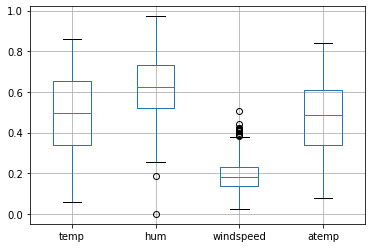

In [7]:
#To use matplotlib package in this notebook
%matplotlib inline  
Bike_Rental[['temp','hum','windspeed','atemp']].boxplot(return_type="dict")
plt.plot() #We are having outliers in hum and windspeed and casual 

[]

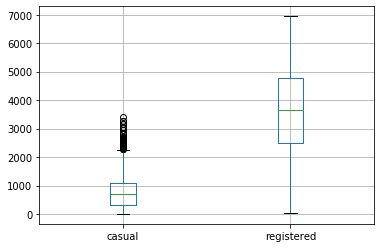

In [8]:
%matplotlib inline  
Bike_Rental[['casual','registered']].boxplot(return_type="dict")
plt.plot() #We are having outliers in hum and windspeed and casual 

In [9]:
#Lets find and remove the outliers
outlier_columns = ["hum","windspeed",'casual']
for i in outlier_columns :
    print (i)
    q75,q25 = np.percentile(Bike_Rental.loc[:,i],[75,25])
    iqr = q75-q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print (min)
    print (max)
    Bike_Rental = Bike_Rental.drop(Bike_Rental[Bike_Rental.loc[:,i] < min].index)
    Bike_Rental = Bike_Rental.drop(Bike_Rental[Bike_Rental.loc[:,i] > max].index)

hum
0.20468725
1.0455212500000002
windspeed
-0.012431000000000025
0.380585
casual
-885.0
2323.0


[]

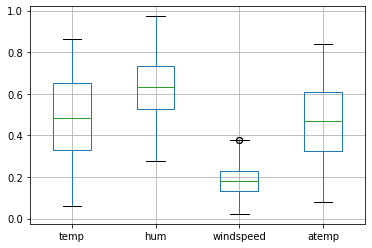

In [10]:
#To use matplotlib package in this notebook
%matplotlib inline  
Bike_Rental[['temp','hum','windspeed','atemp']].boxplot(return_type="dict")
plt.plot() #We are having outliers in hum and windspeed and casual 

[]

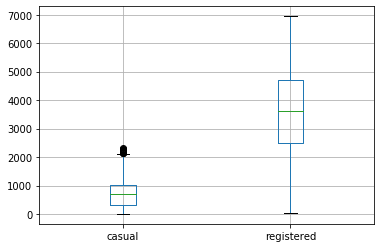

In [11]:
%matplotlib inline  
Bike_Rental[['casual','registered']].boxplot(return_type="dict")
plt.plot() #We are having outliers in hum and windspeed and casual 

## Feature Selection

### 1. Looking for Correlations 

In [12]:
#We are finding the correlation of target variable "cnt" with respect to  the "independent variabls" given below
#The purpose is to find the variables which are important and only to select those one
corr_matrix = Bike_Rental.corr()
corr_matrix['cnt'].sort_values(ascending = False)

cnt           1.000000
registered    0.965803
casual        0.640080
atemp         0.628104
temp          0.625918
yr            0.550472
season        0.420816
mnth          0.294940
workingday    0.195693
weekday       0.032250
holiday      -0.097713
hum          -0.120973
windspeed    -0.230985
weathersit   -0.300869
Name: cnt, dtype: float64

In [13]:
# The features atemp, temp, yr, season, mnth, workingday are having positive correlation with cnt variable
# The features hum, windspeed and weathersit are having negative correlation with cnt variable
# we are dropping casual and registered since cnt is sum of both and we need to predict the same
# atemp and temp are having almost similar correlation with cnt, so if we carry both it will 
#lead to multicollinearity which will decrease our model performance and accuracy.
#so we are only considering temp and not atemp

In [14]:
#We have selected temp, yr , season, mnth, working, hum, windspeed and weathersit

# Graphs

In [15]:
#relation of features with the 'cnt' variable though graph

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6E76CD6D8>,
      dtype=object)

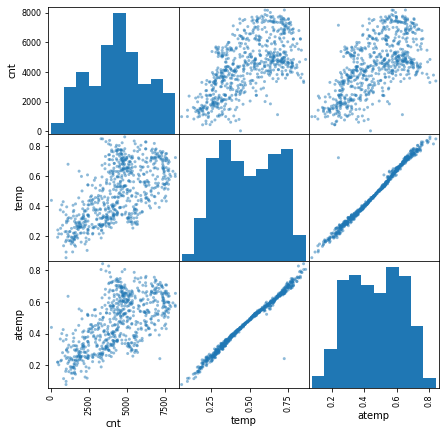

In [20]:
Continous_features = ['cnt','temp','atemp']
scatter_matrix(Bike_Rental[Continous_features],figsize=(7,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6E7AB5278>,
      dtype=object)

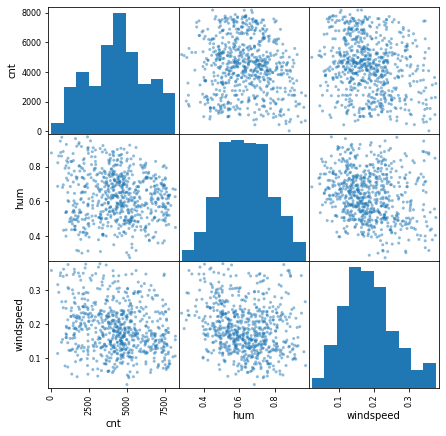

In [22]:
Continous_features1 = ['cnt','hum','windspeed']
scatter_matrix(Bike_Rental[Continous_features1],figsize=(7,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6E89EF438>,
      dtype=object)

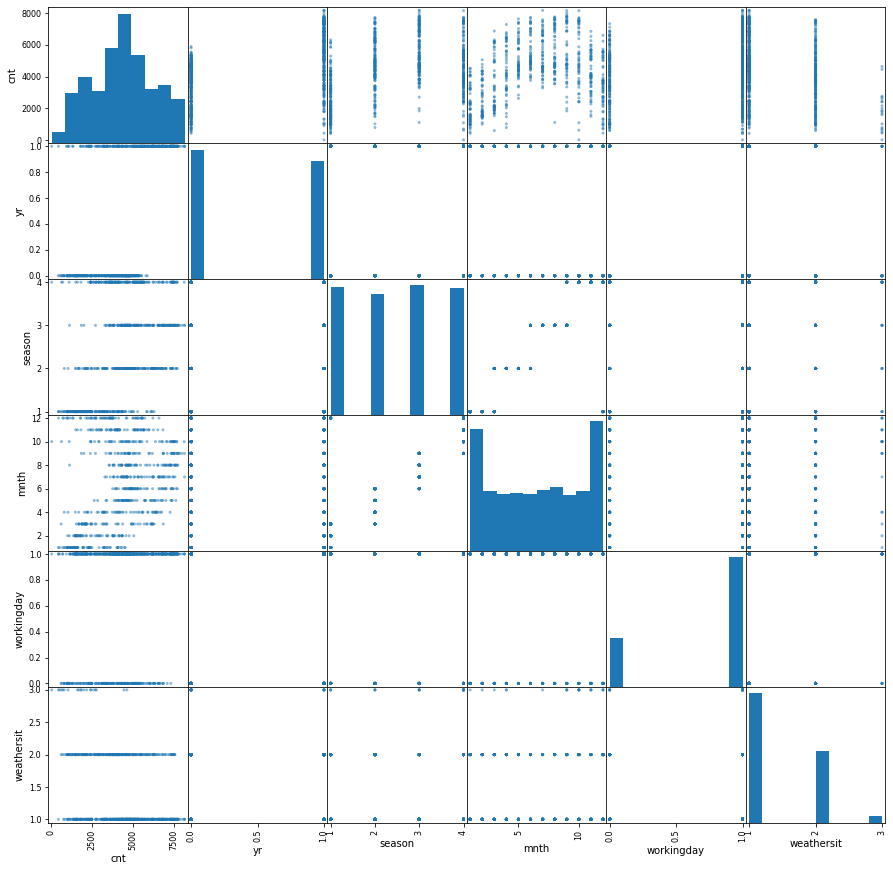

In [24]:
Categorical_features = ['cnt','yr','season','mnth','workingday','weathersit']
scatter_matrix(Bike_Rental[Categorical_features],figsize=(15,15))

## Conversion of Variables to suitable datatypes

In [33]:
#Need to convert the columns into required datatypes
Bike_Rental['dteday'] = pd.to_datetime(Bike_Rental['dteday'],yearfirst=True)
Bike_Rental['season'] = Bike_Rental['season'].astype('category')
Bike_Rental['yr'] = Bike_Rental['yr'].astype('category')
Bike_Rental['mnth'] = Bike_Rental['mnth'].astype('category')
Bike_Rental['holiday'] = Bike_Rental['holiday'].astype('category')
Bike_Rental['weekday'] = Bike_Rental['weekday'].astype('category')
Bike_Rental['workingday'] = Bike_Rental['workingday'].astype('category')
Bike_Rental['weathersit'] = Bike_Rental['weathersit'].astype('category')

Bike_Rental['temp'] = Bike_Rental['temp'].astype('float')
Bike_Rental['atemp'] = Bike_Rental['atemp'].astype('float')
Bike_Rental['hum'] = Bike_Rental['hum'].astype('float')
Bike_Rental['windspeed'] = Bike_Rental['windspeed'].astype('float')
Bike_Rental['casual'] = Bike_Rental['casual'].astype('int')
Bike_Rental['registered'] = Bike_Rental['registered'].astype('int')
Bike_Rental['cnt'] = Bike_Rental['cnt'].astype('int')

In [34]:
Bike_Rental = Bike_Rental.drop(['atemp','weekday','casual','registered','dteday','holiday'], axis =1)

In [35]:
Bike_Rental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 1 to 731
Data columns (total 9 columns):
season        676 non-null category
yr            676 non-null category
mnth          676 non-null category
workingday    676 non-null category
weathersit    676 non-null category
temp          676 non-null float64
hum           676 non-null float64
windspeed     676 non-null float64
cnt           676 non-null int32
dtypes: category(5), float64(3), int32(1)
memory usage: 47.9 KB


# Train - Test data

In [36]:
#Divide data into train and test
from sklearn.model_selection import train_test_split
len1 = len(Bike_Rental.columns) - 1
X = Bike_Rental.values[:,0:len1]
Y = Bike_Rental.values[:,len1]

X_train,X_test,Y_train, Y_test = train_test_split( X, Y, test_size = 0.20,random_state = 42)

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor
# Train the model on training data
RF_model = RandomForestRegressor(n_estimators = 60, random_state = 42).fit(X_train, Y_train)

# Use the forest's predict method on the test data
Y_predict = RF_model.predict(X_test)

# Calculate the absolute errors
Error = np.mean(np.abs((Y_test - Y_predict) / Y_test))* 100
Accuracy = 100 - Error
Accuracy

88.09151462794985

In [38]:
Error

11.908485372050155

# Linear Regression

In [39]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression().fit(X_train, Y_train) 
Y_predict = LR_model.predict(X_test) 
# MAPE
Error = np.mean(np.abs((Y_test - Y_predict) / Y_test))* 100
Accuracy = 100 - Error
Accuracy

83.02951872470967

In [40]:
Error

16.970481275290332

## Conclusion : Randome Forest is having good accuracy than the linear regresssion model. Hence we are selecting RandomForest as our model